In [6]:
import numpy as np
from scipy.optimize import minimize
from collections.abc import Callable
from scipy.special import comb
import matplotlib.pyplot as plt

def calibrate(V0, S0, N, K, f, T, init):
    V0 = np.float64(V0) # option price
    S0 = np.float64(S0) # intial price
    K = np.float64(K) # strike price
    T = np.float64(T) # time to maturity in years
    f = np.float64(f**(T/N)) # scaled discount rate
    init = np.float64(init) # initial upstep guess
    rn_rate = np.float64(2.)
    def summa(u):
        u=np.float64(u)
        return f**N/rn_rate**N * np.sum([comb(N,k)*max(u**k * (2/f-u)**(N-k) * S0 - K,0)\
                for k in range(N+1)])
    fun = lambda u: (summa(u[0]) - V0)**2
    step = minimize(fun, [init], method='Nelder-Mead', bounds=[(1.,4.)])
    return step

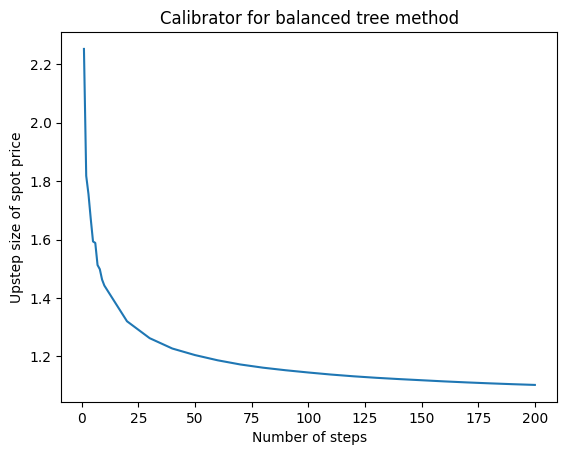

In [7]:
V0 = 5
S0 = 10
K = 12
f = 0.95
T = 1
init = 1.5

Narr = np.concatenate((np.arange(1,10,1), np.arange(10,201, 10)))
step = np.array([calibrate(V0, S0, N, K, f, T, init).x[0] for N in Narr])

plt.figure()
plt.plot(Narr, step)
plt.title('Calibrator for balanced tree method')
plt.xlabel('Number of steps')
plt.ylabel('Upstep size of spot price')
plt.show()

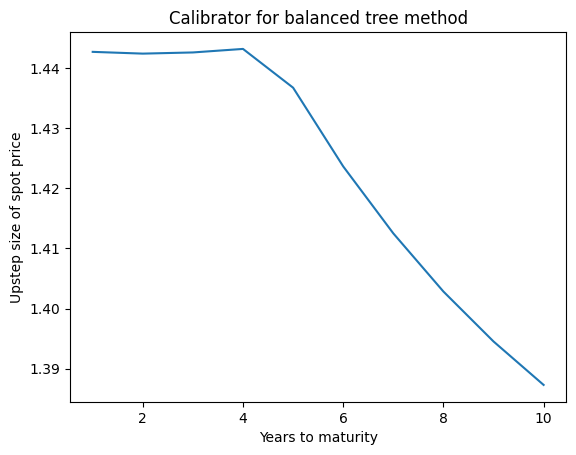

In [8]:
V0 = 5
S0 = 10
N = 10
K = 12
f = 0.95
init = 2

Tarr = np.arange(1,11,1)
step = np.array([calibrate(V0, S0, N, K, f, T, init).x[0] for T in Tarr])

plt.figure()
plt.plot(Tarr, step)
plt.title('Calibrator for balanced tree method')
plt.xlabel('Years to maturity')
plt.ylabel('Upstep size of spot price')
plt.show()

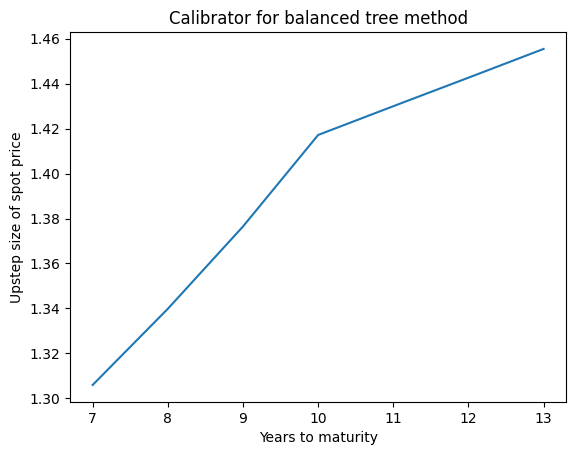

In [11]:
V0 = 5
S0 = 10
N = 10
f = 0.95
T = 1
init = 2

Karr = np.arange(7,14,1)
step = np.array([calibrate(V0, S0, N, K, f, T, init).x[0] for K in Karr])

plt.figure()
plt.plot(Karr, step)
plt.title('Calibrator for balanced tree method')
plt.xlabel('Strike price')
plt.ylabel('Upstep size of spot price')
plt.show()